In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rc("text", usetex=True)
matplotlib.rc("font", family="serif")
matplotlib.style.use("dark_background")

# Building Intuition

In [3]:
def tophat(t, a):
    out = t.copy()
    for i, elem in enumerate(t):
        if abs(elem) > a:
            out[i] = 0.0
        else:
            out[i] = 1.0
    return out

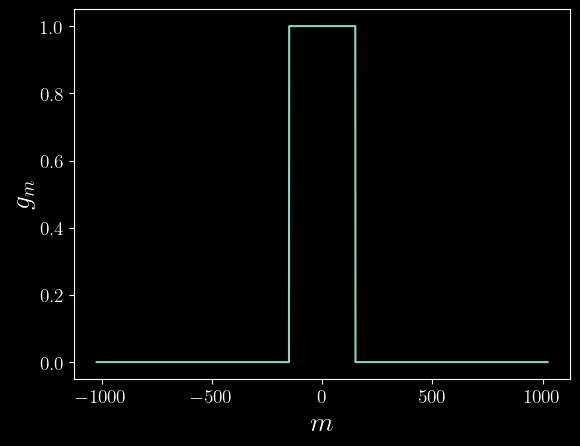

In [4]:
m_coords = np.arange(-1024, 1024)
gt = tophat(m_coords, 150)

fig = plt.figure()
ax = plt.gca()
ax.plot(m_coords, gt)
ax.set_xlabel(r"$m$", fontsize=20)
ax.set_ylabel(r"$g_m$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

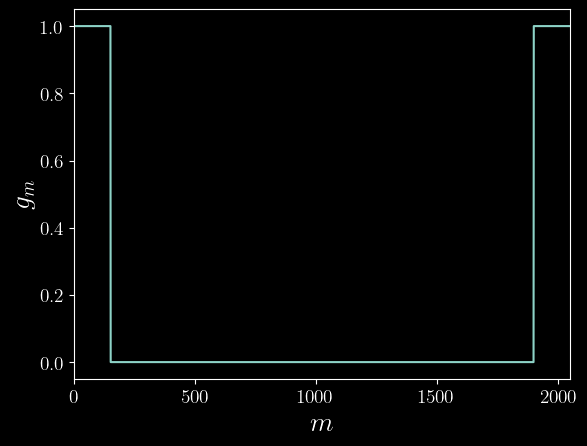

In [5]:
# use numpy routine to "shift" data
fig = plt.figure()
ax = plt.gca()
ax.plot(np.fft.fftshift(gt))
ax.set_xlim((0, 2048))
ax.set_xlabel(r"$m$", fontsize=20)
ax.set_ylabel(r"$g_m$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

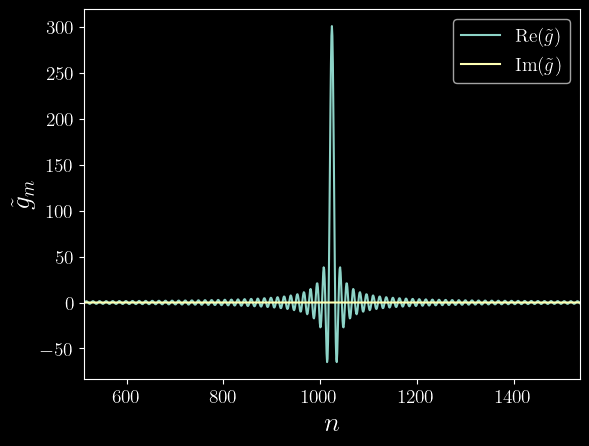

In [6]:
gtilde = np.fft.fftshift(np.fft.fft(np.fft.fftshift(gt)))

fig = plt.figure()
ax = plt.gca()
ax.plot(gtilde.real, label=r"$\mathrm{Re}(\tilde{g})$")
ax.plot(gtilde.imag, label=r"$\mathrm{Im}(\tilde{g})$")
ax.set_xlim((512, 1536))
ax.set_xlabel(r"$n$", fontsize=20)
ax.set_ylabel(r"$\tilde{g}_m$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, fontsize=14)

In [7]:
def gt(t, a):
    out = t.copy()
    for i, elem in enumerate(t):
        if abs(elem) > a:
            out[i] = 0.0
        else:
            out[i] = 1.0
    return out

def gtilde(f, a):
    return a * np.sinc(f * a)

In [8]:
t, dt = np.linspace(-10.0, 10.0, num=1000, retstep=True, endpoint=False)
print(dt)

0.02


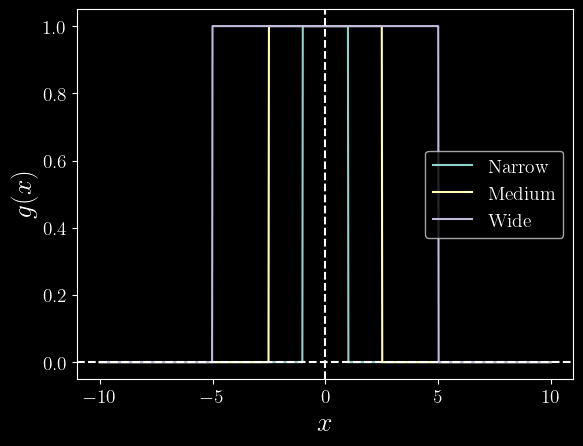

In [9]:
fig = plt.figure()
ax = plt.gca()
ax.plot(t, gt(t, 1.0), label="Narrow")
ax.plot(t, gt(t, 2.5), label="Medium")
ax.plot(t, gt(t, 5.0), label="Wide")
ax.axhline(y=0.0, color="w", linestyle="--")
ax.axvline(x=0.0, color="w", linestyle="--")
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$g(x)$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, fontsize=14)

(-5.0, 5.0)

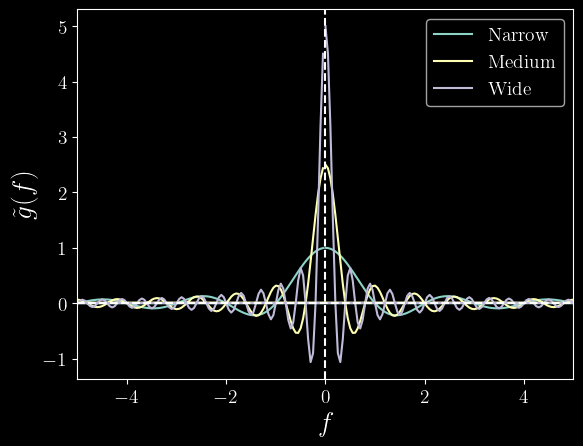

In [10]:
# define the frequencies
freq = np.fft.fftfreq(n=len(t), d=dt)

fig = plt.figure()
ax = plt.gca()
ax.plot(freq, gtilde(freq, 1.0), label="Narrow")
ax.plot(freq, gtilde(freq, 2.5), label="Medium")
ax.plot(freq, gtilde(freq, 5.0), label="Wide")
ax.axhline(y=0.0, color="w", linestyle="--")
ax.axvline(x=0.0, color="w", linestyle="--")
ax.set_xlabel("$f$", fontsize=20)
ax.set_ylabel(r"$\tilde{g}(f)$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
ax.legend(loc=0, fontsize=14)
ax.set_xlim((-5, 5))